<a href="https://colab.research.google.com/github/erikroruiz/OCT_style_transfer/blob/main/images_comparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
pip install sewar

  Created wheel for sewar: filename=sewar-0.4.4-py3-none-any.whl size=10390 sha256=0ed33612b5fabb0f0d332eb67507784270c5b3837235b63b5b6c6c348e94c637
  Stored in directory: /root/.cache/pip/wheels/b5/00/df/f1ba40d0d44c95b0db52804e518c128d5631866b91ea1960ba
Successfully built sewar


In [ ]:
import os
import cv2 
import calendar;
import time;
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

from PIL import Image
from google.colab import drive
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp


In [ ]:
#Creamos la carpeta origen de Google Drive
BASE_FOLDER = '/content/drive/My Drive/TFM/'
# Montamos la carpeta en Google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# exp_list = ["cycleGAN_119c_119n_unpaired_bs7", "cycleGAN_221c_221n_unpaired_bs7", "cycleGAN_238c_238n_unpaired_bs7", "cycleGAN_663c_663n_unpaired_bs7",
#             "pix2pix_119c_119n_paired_bs7", "pix2pix_221c_221n_paired_bs7", "pix2pix_238c_238n_paired_bs7", "pix2pix_663c_663n_paired_bs7"]

# exp_list = ["pix2pix_119c_119n_paired_bs1", "pix2pix_221c_221n_paired_bs1", "pix2pix_238c_238n_paired_bs1", "pix2pix_663c_663n_paired_bs1"]
exp_list = ["cycleGAN_119c_119n_unpaired_bs1", "cycleGAN_221c_221n_unpaired_bs1", "cycleGAN_238c_238n_unpaired_bs1", "cycleGAN_663c_663n_unpaired_bs1"]

In [ ]:
# Cargamos los nombres de las imagenes completas que vamos a procesar 
orig_n_images_names = [] 
orig_c_images_names = [] 

for id in range(0,5):
    orig_n_images_names.append(BASE_FOLDER+'datasets/test/images/L%0.2d.tif' % (id+1))
    orig_c_images_names.append(BASE_FOLDER+'datasets/test/images/Bscan/H%0.2d.tif' % (id+1))

print ("Nombres de las imágenes noise:",type(orig_n_images_names), len(orig_n_images_names))
print ("Nombres de las imágenes bscan:",type(orig_c_images_names), len(orig_c_images_names))
print (orig_c_images_names)
print (orig_n_images_names)

Nombres de las imágenes noise: <class 'list'> 5
Nombres de las imágenes bscan: <class 'list'> 5
['/content/drive/My Drive/TFM/datasets/test/images/Bscan/H01.tif', '/content/drive/My Drive/TFM/datasets/test/images/Bscan/H02.tif', '/content/drive/My Drive/TFM/datasets/test/images/Bscan/H03.tif', '/content/drive/My Drive/TFM/datasets/test/images/Bscan/H04.tif', '/content/drive/My Drive/TFM/datasets/test/images/Bscan/H05.tif']
['/content/drive/My Drive/TFM/datasets/test/images/L01.tif', '/content/drive/My Drive/TFM/datasets/test/images/L02.tif', '/content/drive/My Drive/TFM/datasets/test/images/L03.tif', '/content/drive/My Drive/TFM/datasets/test/images/L04.tif', '/content/drive/My Drive/TFM/datasets/test/images/L05.tif']


In [ ]:
def comparar (org, gen, n_img):
  return [n_img, float(mse(gen,org)), float(rmse(gen, org)), float(psnr(gen, org)), float(uqi(gen, org)), float(ergas(gen, org)), float(scc(gen, org)), float(rase(gen, org)), float(sam(gen, org)), float(vifp(gen, org))] 

def comparar_ssim (org, gen, n_img):
  return [n_img, ssim(gen, org), msssim(gen, org)]

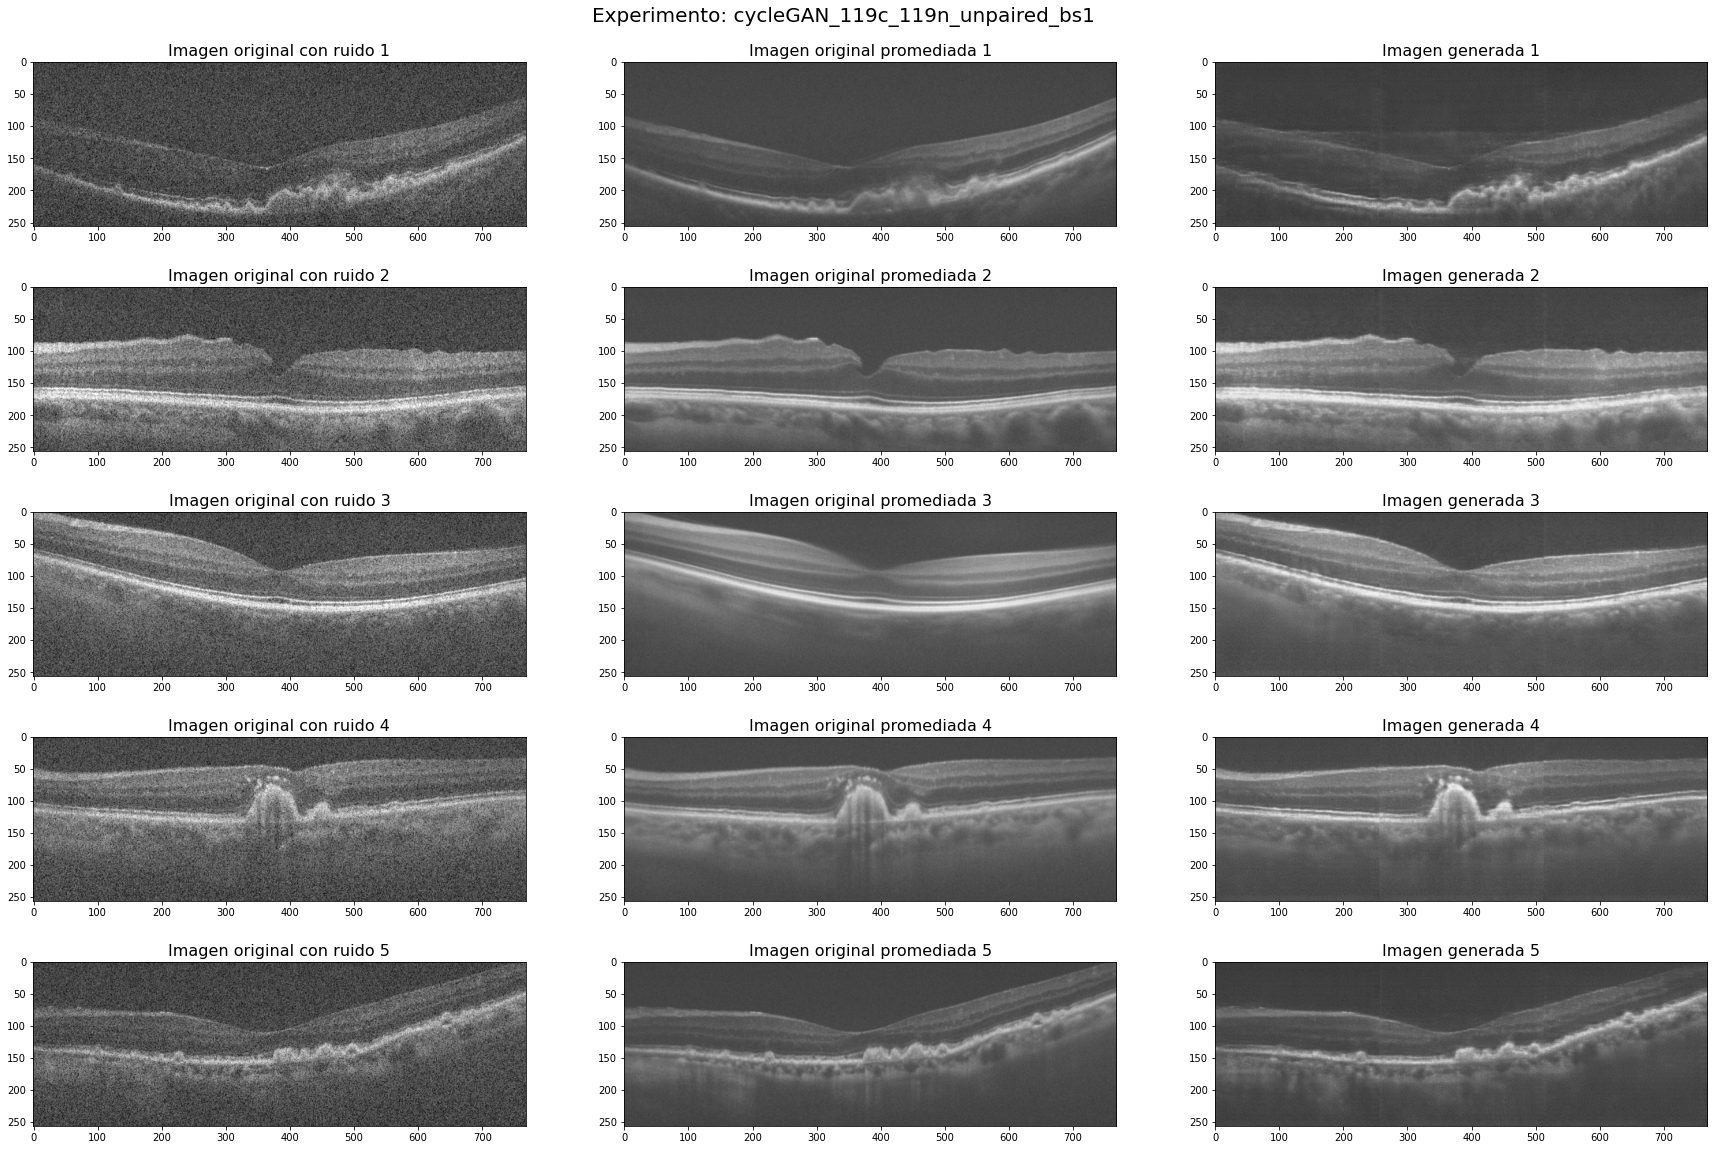

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


MSE       RMSE       PSNR  ...        RASE       SAM       VIF
IMAGEN                                    ...                                
1       142.017512  11.917110  26.607385  ...  815.152799  0.139386  0.090030
2       349.452103  18.693638  22.696927  ...  818.208149  0.117446  0.186697
3       115.632070  10.753235  27.500021  ...  540.818242  0.092286  0.190186
4        87.876923   9.374269  28.692055  ...  518.738660  0.091506  0.207510
5        62.416728   7.900426  30.177794  ...  571.531062  0.088761  0.197528
MEAN    151.479067  11.727736  27.134836  ...  652.889782  0.105877  0.174390

[6 rows x 9 columns]

SSIM                   MSSSIM
IMAGEN                                                                   
1       (0.6440543801875762, 0.6467474795488524)  (0.8329225033441777+0j)
2       (0.6862752908636126, 0.6920835475477022)  (0.8791848895233242+0j)
3       (0.6939582017820513, 0.6949748524312827)  (0.8928135272307831+0j)
4       (0.7270402458305779, 0.7277707287052589)  (0.9041051614350026+0j)
5       (0.7547368882988855, 0.7558869460240264)  (0.9207078108302681+0j)

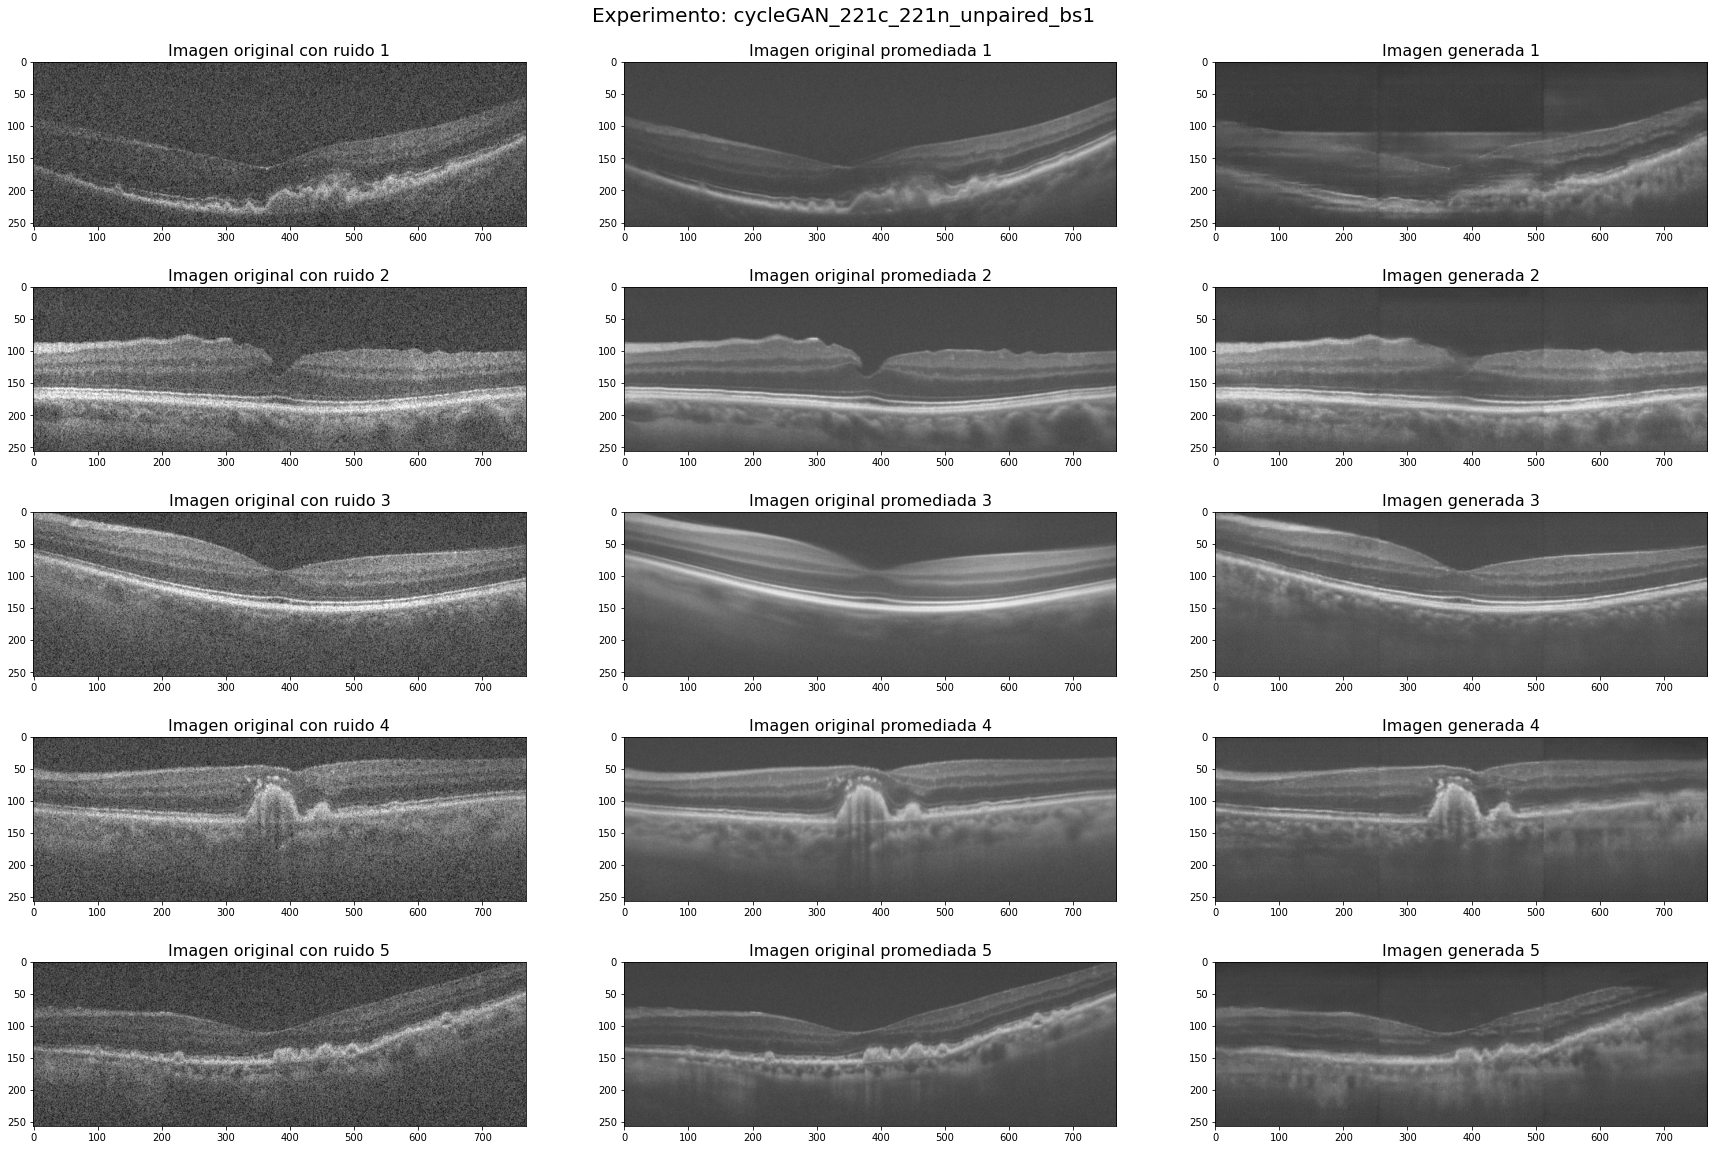

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


MSE       RMSE       PSNR  ...        RASE       SAM       VIF
IMAGEN                                    ...                                
1       166.681590  12.910522  25.911927  ...  905.447737  0.152980  0.076601
2       177.571538  13.325597  25.637070  ...  683.241687  0.110153  0.181767
3       167.522486  12.943048  25.890073  ...  675.831876  0.106192  0.188313
4       143.838979  11.993289  26.552038  ...  694.487308  0.102152  0.174799
5        98.066371   9.902847  28.215603  ...  652.838529  0.113710  0.159890
MEAN    150.736193  12.215061  26.441342  ...  722.369427  0.117038  0.156274

[6 rows x 9 columns]

SSIM                   MSSSIM
IMAGEN                                                                   
1       (0.6217939529641647, 0.6259215369286943)  (0.7636836264010118+0j)
2       (0.6872603080132659, 0.6900249065950673)  (0.8808359805751341+0j)
3       (0.6972335977099311, 0.6997508403876723)  (0.8839841629070416+0j)
4       (0.6994236206922576, 0.7019618260384104)  (0.8642978674315472+0j)
5       (0.7229736029406176, 0.7252756192925425)  (0.8770166554366223+0j)

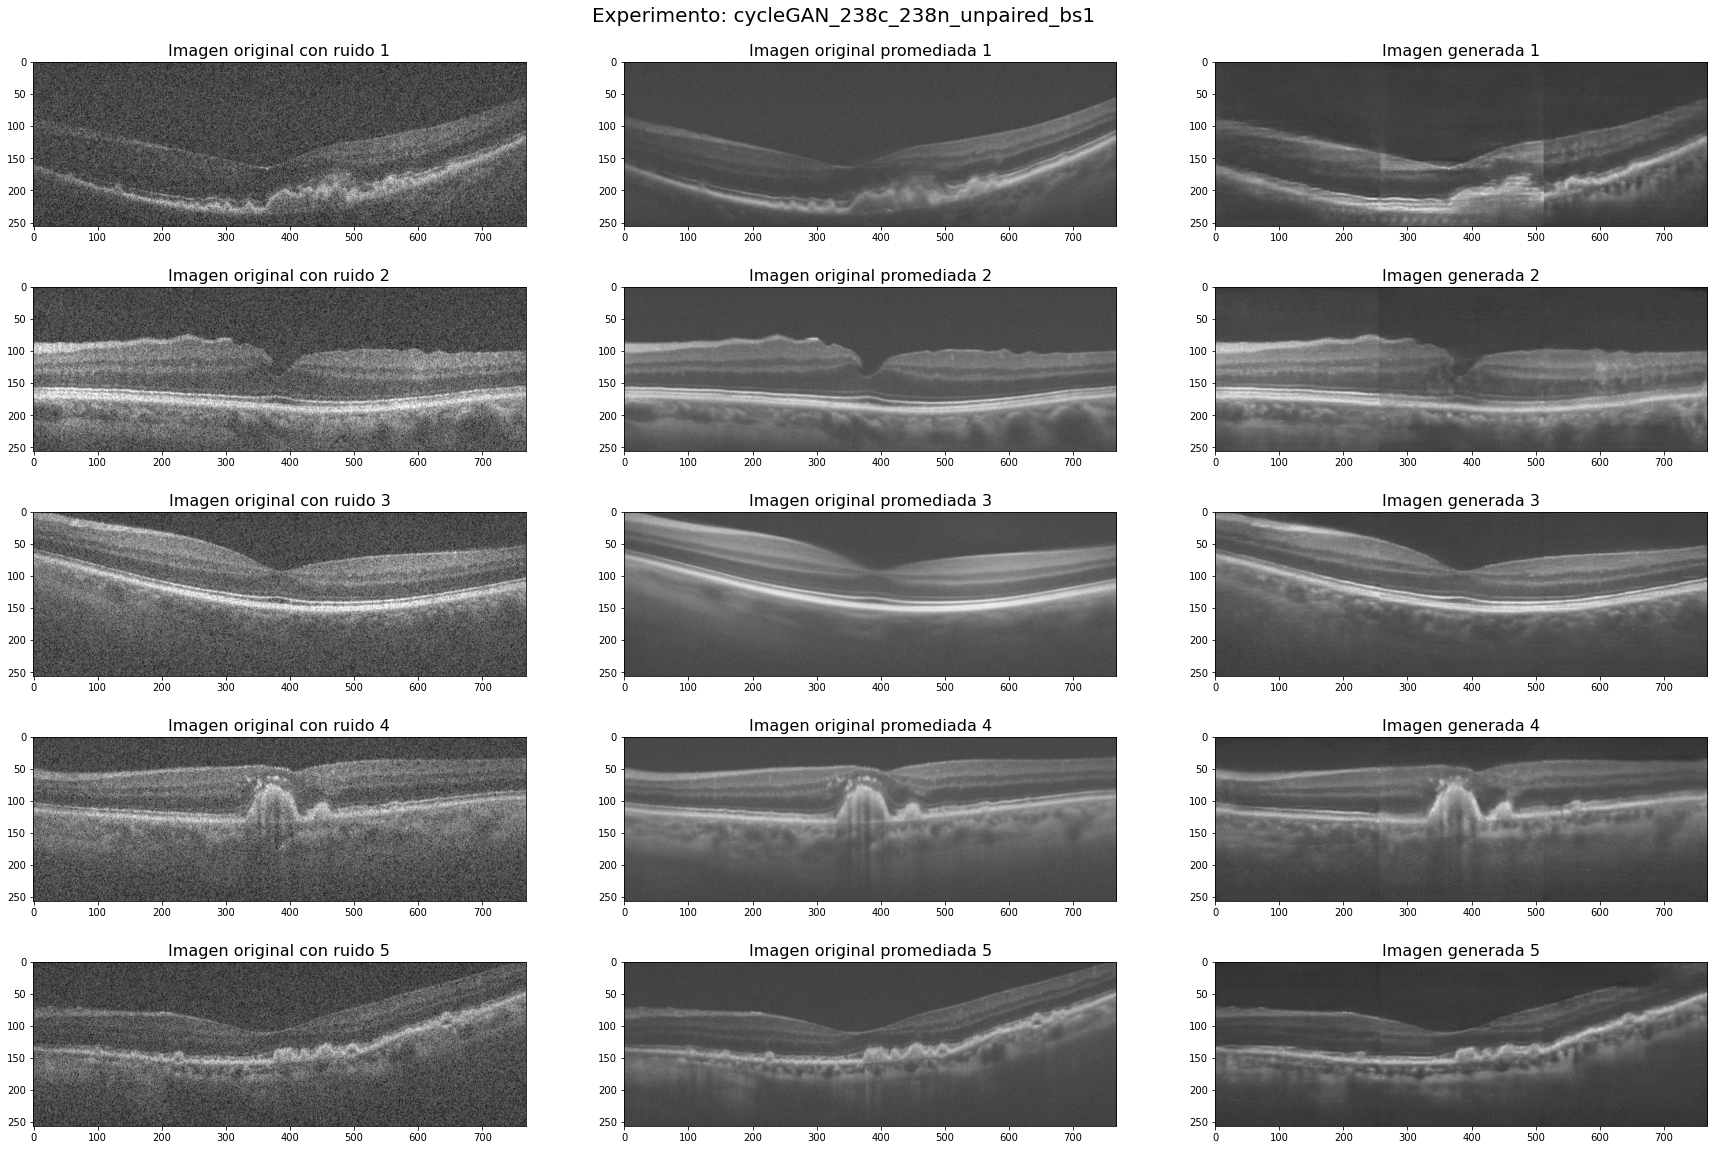

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


MSE       RMSE       PSNR  ...         RASE       SAM       VIF
IMAGEN                                    ...                                 
1       312.588353  17.680168  23.181076  ...  1115.498955  0.208866  0.086657
2       194.144602  13.933578  25.249550  ...   854.386666  0.136546  0.170744
3       174.555710  13.211953  25.711463  ...   843.330959  0.099666  0.191034
4       182.747543  13.518415  25.512288  ...   958.429171  0.106599  0.184023
5       158.295064  12.581537  26.136130  ...  1091.538013  0.118381  0.183524
MEAN    204.466255  14.185130  25.158101  ...   972.636753  0.134011  0.163196

[6 rows x 9 columns]

SSIM                   MSSSIM
IMAGEN                                                                   
1       (0.6074252649908815, 0.6139683183799716)  (0.7917296647675489+0j)
2       (0.6699011456386964, 0.6740383731248561)  (0.8712990419161437+0j)
3        (0.6887315850689443, 0.692605995016963)  (0.8939630162299372+0j)
4       (0.7018544301131476, 0.7074861601886223)  (0.8822271587240603+0j)
5       (0.7333328027060513, 0.7411629668450294)   (0.901023303567487+0j)

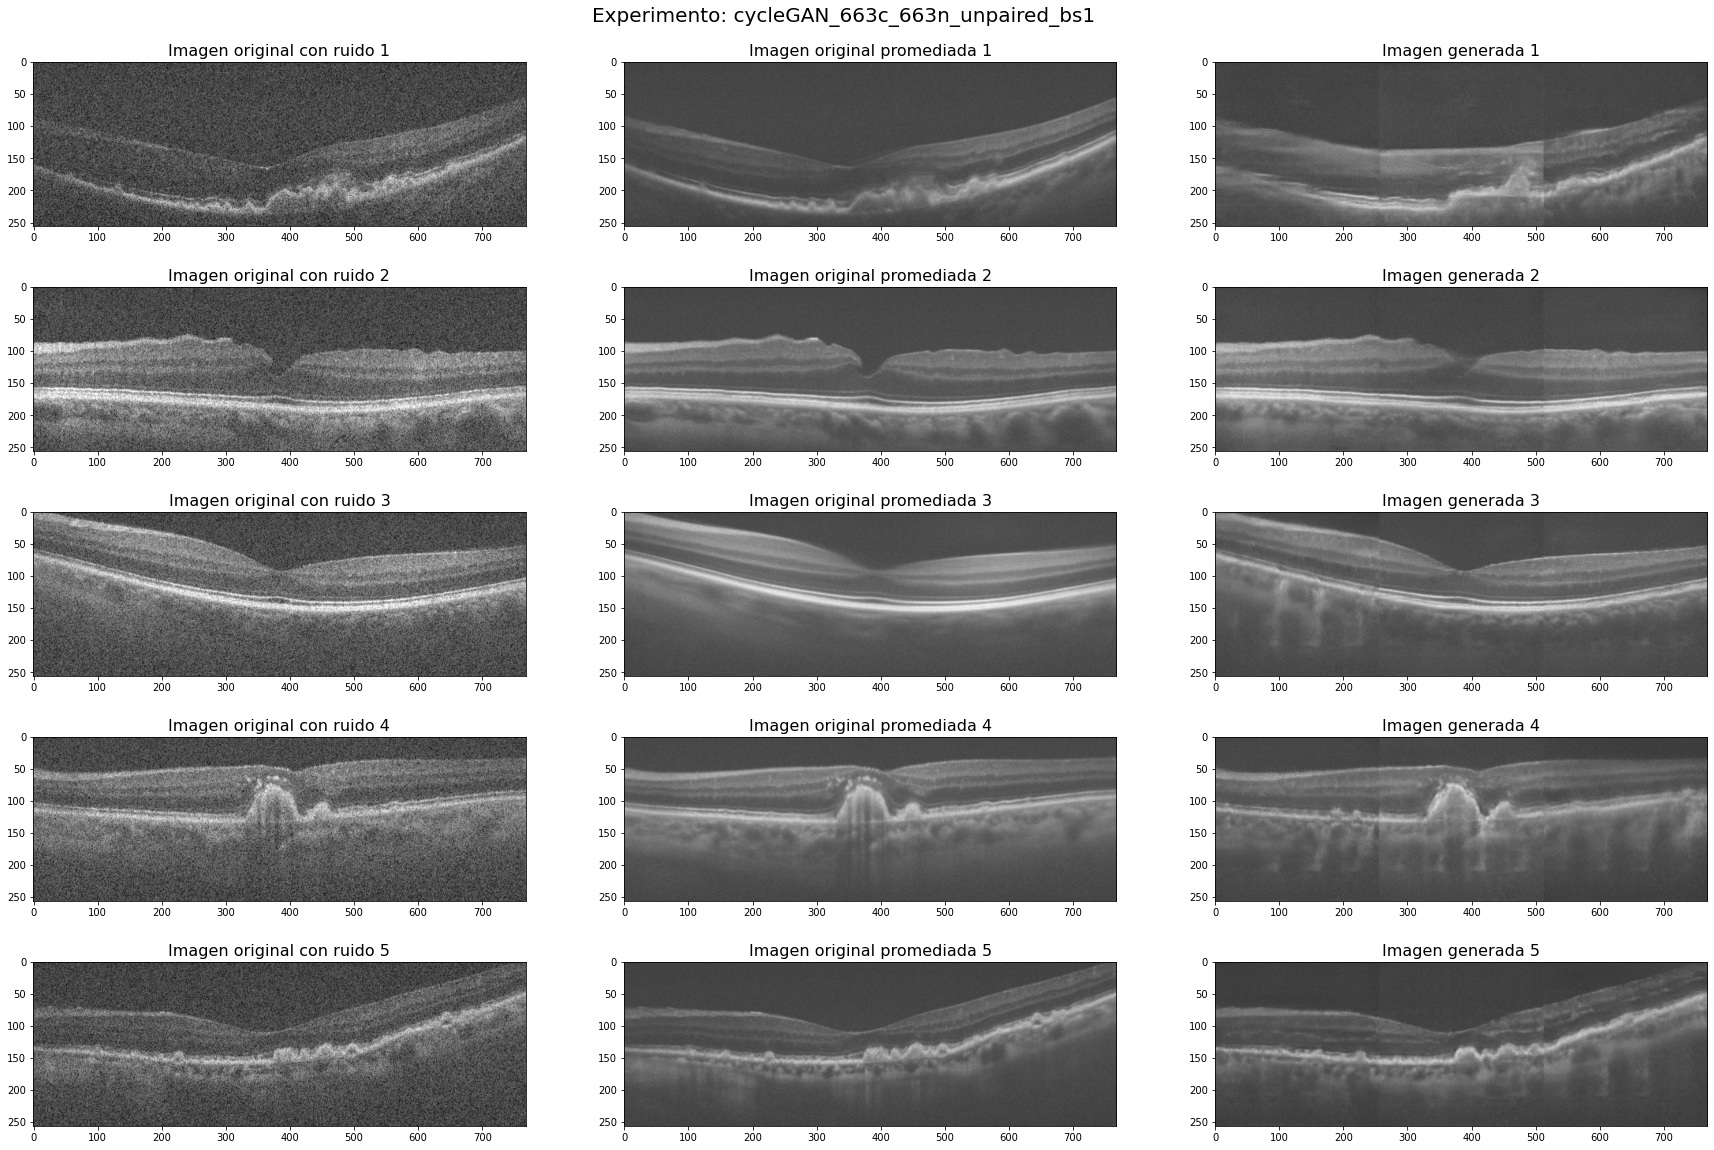

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


MSE       RMSE       PSNR  ...        RASE       SAM       VIF
IMAGEN                                    ...                                
1       347.601817  18.644083  22.719983  ...  864.614887  0.182742  0.080324
2       154.460602  12.428218  26.242626  ...  622.029961  0.108944  0.200029
3       181.919210  13.487743  25.532018  ...  698.740992  0.104027  0.196946
4       160.006048  12.649350  26.089440  ...  733.007086  0.112218  0.164673
5        80.468419   8.970419  29.074549  ...  623.778212  0.102589  0.164081
MEAN    184.891219  13.235962  25.931723  ...  708.434228  0.122104  0.161211

[6 rows x 9 columns]

SSIM                   MSSSIM
IMAGEN                                                                   
1       (0.6150557770680097, 0.6204643905756911)  (0.7562818509539595+0j)
2       (0.7120731914682347, 0.7144028218709194)  (0.8974505851374763+0j)
3       (0.7033683420641633, 0.7062630630164923)  (0.8749140183343552+0j)
4        (0.6861023075184197, 0.689010932048021)  (0.8336608513327134+0j)
5       (0.7334122406112149, 0.7350568836492989)   (0.885439119618419+0j)

In [ ]:
gen_images_names = [] 

for i in range(0,len(exp_list)):
  gen_images_names = glob.glob(BASE_FOLDER+exp_list[i]+'/images/*.tif')
  # print("Lista de imágenes generadas (",exp_list[i],") = ",gen_images_names)
  gen_images_names.sort()
  # print("Lista de imágenes generadas ordenadas (",exp_list[i],") = ",gen_images_names)
  cont=0
  # fig, ax = plt.subplots()
  fig = plt.figure(figsize=(30,20))
  fig.suptitle("Experimento: "+exp_list[i], y=0.91, fontsize=20)
  lista_comp = []
  lista_comp_ssim = []
  for j in range(0,5):
    dsize = (768, 256)
    orig_n_img = cv2.imread(orig_n_images_names[j])
    orig_n_img = cv2.resize(orig_n_img, dsize)
    orig_c_img = cv2.imread(orig_c_images_names[j])
    orig_c_img = cv2.resize(orig_c_img, dsize)
    gen_img = cv2.imread(gen_images_names[j])

    # Casting to int for matplotlib to display the images
    cont+=1
    plt.subplot(5,3,cont)

    plt.title('Imagen original con ruido '+str(j+1), fontsize=16)
    plt.imshow(orig_n_img)

    cont+=1
    plt.subplot(5,3,cont)
    plt.title('Imagen original promediada '+str(j+1), fontsize=16)
    plt.imshow(orig_c_img)

    cont+=1
    plt.subplot(5,3,cont)
    plt.title('Imagen generada '+str(j+1), fontsize=16)
    plt.imshow(gen_img)

    lista_comp.append(comparar(orig_c_img, gen_img, j+1))
    lista_comp_ssim.append(comparar_ssim(orig_c_img, gen_img, j+1))
    plt.axis('on')

  plt.show()
  # Salvamos la imágenes
  fig.savefig(BASE_FOLDER+''+exp_list[i]+'/results/imgs_comparativa.png')
  
  # Generamos la tabla de resultados y la guardamos en un excel

  df_comp = pd.DataFrame(np.array(lista_comp), columns=['IMAGEN','MSE', 'RMSE', 'PSNR','UQI','ERGAS','SCC','RASE','SAM','VIF'])
  df_comp_ssim = pd.DataFrame(np.array(lista_comp_ssim), columns=['IMAGEN','SSIM','MSSSIM'])
  df_comp = df_comp.set_index('IMAGEN')
  df_comp.index = df_comp.index.astype(int)
  df_comp_ssim = df_comp_ssim.set_index('IMAGEN')
  df_comp.loc['MEAN',:] = df_comp.mean(skipna=False, axis=0)
  display(df_comp)
  display(df_comp_ssim)
  df_comp.to_csv(BASE_FOLDER+''+exp_list[i]+'/results/table_'+exp_list[i]+'.csv',  index=True)  
  df_comp_ssim.to_csv(BASE_FOLDER+''+exp_list[i]+'/results/table_ssim_'+exp_list[i]+'.csv',  index=True)
